# <center><font color='#333333'>Use Python to Update the Word Report</font></center>
### <center><font color='#3b5998'>Created by cyda - Yeung Wong & Carrie Lo</font></center>

--------------------------------------------------------------------------------------
![logo](https://4.bp.blogspot.com/-LAXjdvVCYCU/WxeQFKQ-1wI/AAAAAAAAACs/o8IJ1eLLAEwQYv2Az7EqQi9jODTqRx7wACK4BGAYYCw/s1000/tight%2Bbanner_with_description.png)

--------------------------------------------------------------------------------------
Please acknowledge <b>team cyda - Yeung Wong & Carrie Lo</b> when using the code

<b><font color='#3b5998'>If you find this script is helpful, please feel free to endorse us through Linkedin!</font></b>

<b>Linkedin:</b>

Yeung Wong - https://www.linkedin.com/in/yeungwong/

Carrie Lo - https://www.linkedin.com/in/carrielsc/

--------------------------------------------------------------------------------------

# Step 0 - Directory

In [1]:
import os
work_dir = os.getcwd()

# Step 1 - Data Preprocessing

In [2]:
import requests
import pandas as pd
from datetime import datetime

datetime_now = datetime.now()
full_list_url='https://finance.yahoo.com/currencies'
header = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
full_list_page = requests.get(full_list_url, headers=header)
df = pd.read_html(full_list_page.text)[0].drop_duplicates()
df['pct_change'] = df['% Change'].str.slice(stop=-1).astype(float)
df

,Symbol,Name,Last Price,Change,% Change,52 Week Range,Day Chart,pct_change
0,EURUSD=X,EUR/USD,1.0731,0.0000,-0.00%,NaN,NaN,-0.00
1,JPY=X,USD/JPY,140.5950,0.5440,+0.39%,NaN,NaN,0.39
2,GBPUSD=X,USD/GBP,1.2349,0.0028,+0.22%,NaN,NaN,0.22
3,AUDUSD=X,USD/AUD,0.6520,0.0009,+0.14%,NaN,NaN,0.14
4,NZDUSD=X,USD/NZD,0.6052,-0.0014,-0.24%,NaN,NaN,-0.24
5,EURJPY=X,EUR/JPY,150.8700,0.6480,+0.43%,NaN,NaN,0.43
6,GBPJPY=X,GBP/JPY,173.6740,1.1400,+0.66%,NaN,NaN,0.66
7,EURGBP=X,EUR/GBP,0.8687,-0.0016,-0.19%,NaN,NaN,-0.19
8,EURCAD=X,EUR/CAD,1.4600,-0.0028,-0.19%,NaN,NaN,-0.19
9,EURSEK=X,EUR/SEK,11.5952,-0.0042,-0.04%,NaN,NaN,-0.04


In [3]:
top_df = df.sort_values(['pct_change'], ascending=False).reset_index(drop=True)[:5]
top_df = top_df[['Name', 'Last Price', 'Change', '% Change']]
top_df

,Name,Last Price,Change,% Change
0,GBP/JPY,173.6740,1.1400,+0.66%
1,EUR/JPY,150.8700,0.6480,+0.43%
2,USD/JPY,140.5950,0.5440,+0.39%
3,USD/THB,34.7120,0.1150,+0.33%
4,USD/GBP,1.2349,0.0028,+0.22%


In [4]:
bottom_df = df.sort_values(['pct_change'], ascending=True).reset_index(drop=True)[:5]
bottom_df = bottom_df[['Name', 'Last Price', 'Change', '% Change']]
bottom_df

,Name,Last Price,Change,% Change
0,USD/MXN,17.6080,-0.2422,-1.36%
1,USD/ZAR,19.6449,-0.1715,-0.87%
2,USD/RUB,79.4500,-0.5950,-0.74%
3,EUR/HUF,370.5900,-2.2100,-0.59%
4,USD/MYR,4.5970,-0.0260,-0.56%


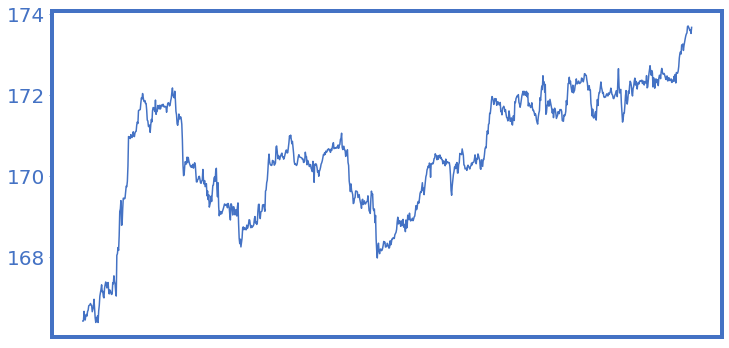

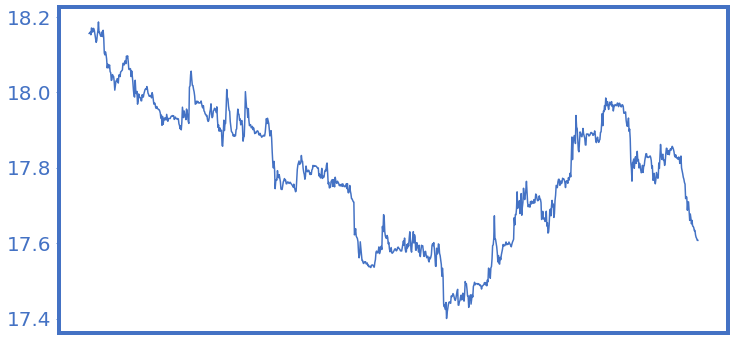

In [5]:
import json
import matplotlib.pyplot as plt

top_name = top_df['Name'][0].replace('/', '')
bottom_name = bottom_df['Name'][0].replace('/', '')

for idx in range(2):
    
    name = [top_name, bottom_name][idx]
    file_path = [f'{work_dir}/top.png', f'{work_dir}/bottom.png']
    
    url = 'https://query1.finance.yahoo.com/v8/finance/chart/' + name + '=X?region=US&lang=en-US&includePrePost=false&interval=30m&useYfid=true&range=1mo&corsDomain=finance.yahoo.com&.tsrc=finance'
    header = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
    page = requests.get(url, headers=header)
    temp_json = json.loads(page.text)
    price_list = temp_json['chart']['result'][0]['indicators']['quote'][0]['close']
    price_list = [price for price in price_list if price != None]
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(price_list, color='#4472C4')
    ax.set_xticks([])
    ax.tick_params(axis='y', colors='#4472C4', labelsize=20)
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_color('#4472C4')
        ax.spines[axis].set_linewidth(4)
    plt.savefig(file_path[idx], transparent=True)

# Step 2 - Word Updating

In [6]:
from docx import Document
from docx.enum.section import WD_ORIENT
from docx.shared import Inches, Pt
from docx.enum.text import WD_PARAGRAPH_ALIGNMENT, WD_BREAK
from docx.oxml import OxmlElement

In [7]:
# for first-time creation:
# Create a new document
document = Document()

## Change page orientation (and size)
# section = document.sections[-1]
# new_width, new_height = section.page_height, section.page_width
# section.orientation = WD_ORIENT.LANDSCAPE
# section.page_width = new_width
# section.page_height = new_height

# Add some empty rows
empty_run = document.add_paragraph().add_run()
empty_run.add_break()
empty_run.add_break()
empty_run.add_break()
empty_run.add_break()

# Add a bold heading
heading_paragraph = document.add_paragraph()
heading_paragraph.alignment = WD_PARAGRAPH_ALIGNMENT.CENTER # make the heading center
heading_run = heading_paragraph.add_run()
heading_run.font.size = Pt(32)  # Set font size to 16pt
heading_run.text = "Weekly Update of Currencies"
heading_run.bold = True

# Add paragraphs
document.add_paragraph("This is the weekly update of the project progress.")


# Create a page break run
new_paragraph = document.add_paragraph()
new_run = new_paragraph.add_run()
new_run.add_break(WD_BREAK.PAGE)

# Add a table
table = document.add_table(rows=6, cols=4)
table.cell(0, 0).text = "Name"
table.cell(0, 1).text = "Last Price"
table.cell(0, 2).text = "Change"
table.cell(0, 3).text = "% Change"
table.cell(1, 0).text = "Name1"
table.cell(1, 1).text = "Last Price1"
table.cell(1, 2).text = "Change1"
table.cell(1, 3).text = "% Change1"

# Add headings
document.add_heading("Top 5", level=2)

# Add an image
top_img_path = "top.png"
document.add_picture(top_img_path, width=Inches(5.30))

# Save the document
document.save(f"{work_dir}/example.docx")

In [8]:
# For updating:
document = Document(f"{work_dir}/Currencies_template.docx")
all_paras = document.paragraphs
len(all_paras)

34

In [9]:
# Manual way to locate the index of the target paragraph
for i in range(0, len(all_paras)):
    print(i, all_paras[i].text)

0 
1 
2 
3 
4 
5 
6 
7 
8 
9 Weekly Update of Currencies
10 This is the weekly update of the project progress.
11 
12 Updated on 9 Dec 2021 17:51
13 

14 
15 
16 Top 5 currencies:
17 
18 
19 
20 
21 
22 
23 
24 
25 
26 
27 Bottom 5 currencies:
28 
Highlights:
29 USD / ZAR:
30 
31 USD / ZAR:
32 
33 


In [10]:
# # Use 'search_text' function to locate the index of the target_text
# def search_text(document, target_text):
#     target_para_index = []
#     for i, paragraph in enumerate(document.paragraphs):
#         if target_text in paragraph.text:
#             target_para_index.append(i)
#     return target_para_index
# search_text(document, 'Updated on')

# Update last update date
target_para_index = 12 # replace target_para_index 
update_dt = datetime_now.strftime("%#d %b %Y %H:%M")
all_paras[target_para_index].text = update_dt
print(f"Update datetime: {update_dt}")

# Update top table
top_table = document.tables[0]
for i in range(5):
    for j in range(4):
        cell = top_table.cell(i+1, j)
        cell.text = str(top_df.iloc[i, j])

# Update bottom table
bottom_table = document.tables[1]
for i in range(5):
    for j in range(4):
        cell = bottom_table.cell(i+1, j)
        cell.text = str(bottom_df.iloc[i, j])
print("Table figures are updated.")

# Update top 5 figure label
target_para_index = 29 # replace target_para_index 
paragraph = document.paragraphs[target_para_index]
for run in paragraph.runs:
    run.bold = True
    run.font.size = Pt(18)
    run.text = top_df['Name'][0].replace('/', ' / ')

# Update bottom 5 figure label
target_para_index = 31 # replace target_para_index 
paragraph = document.paragraphs[target_para_index]
for run in paragraph.runs:
    run.bold = True
    run.font.size = Pt(18)
    run.text = bottom_df['Name'][0].replace('/', ' / ')
print("Figure labels are updated.")

Update datetime: 28 May 2023 16:05
Table figures are updated.
Figure labels are updated.


In [11]:
target_para_index = 29 # replace target_para_index 
paragraph = document.paragraphs[target_para_index]
for run in paragraph.runs:
    run.bold = True
    run.font.size = Pt(18)

In [12]:
# Find rID of target picture
for rel in document.part.rels.values():
    if "image" in rel.reltype:
        image_part = document.part.related_parts[[k for k, v in document.part.rels.items() if v == rel][0]]
        print([k for k, v in document.part.rels.items() if v == rel][0])

rId8
rId7


In [13]:
# Update pictures
def replace_picture_by_rID(document, target_rID, new_image_path):
    # target_rID = 'rId7'  # Specify the rID of the target picture
    # new_image_path = 'top.png' # Specify the new_image_path to the new image file
    rels = document.part.rels
    for rel in rels:
        if rels[rel].reltype == "http://schemas.openxmlformats.org/officeDocument/2006/relationships/image":
            if rel == target_rID:
                relationship = rels[rel]
                image_part = relationship.target_part
                image_part._blob = open(new_image_path, 'rb').read()

                # Optional: Resize the new image if desired
                new_width = Inches(2)  # Adjust the width as needed
                new_height = Inches(3)  # Adjust the height as needed
                image_part.width = new_width
                image_part.height = new_height

                return True

    return False

# Call the function to replace the picture
success = replace_picture_by_rID(document, 'rId8', 'top.png')
success = replace_picture_by_rID(document, 'rId7', 'bottom.png')

if success:
    print("Pictures are replaced.")
else:
    print("Target picture not found.")

Pictures are replaced.


In [14]:
# Save the modified document
update_d = datetime_now.strftime("%Y%m%#d")
document.save(f"{work_dir}/Currencies_{update_d}.docx")
print("Document is saved.")

Document is saved.


In [15]:
# # Find the target paragraph index
# def get_paragraphs_by_rID(document, target_rID):
#     for i, paragraph in enumerate(document.paragraphs):
#         for run in paragraph.runs:
#             if target_rID in run._r.xml:
#                 return i
            
# print(get_paragraphs_by_rID(document, 'rId7'))
# print(get_paragraphs_by_rID(document, 'rId8'))

# Step 3 - Export to PDF

In [16]:
from docx2pdf import convert

# Convert .docx to .pdf
convert(f"{work_dir}/Currencies_{update_d}.docx", f"{work_dir}/Currencies_{update_d}.pdf")

  0%|          | 0/1 [00:00<?, ?it/s]